# Heat equation, Finite Difference, p1 MIT 2016

_Gilbert François Duivesteijn_

In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.linalg import toeplitz

_This is mini project 1, from the course "Numerical Methods for PDE", Qiqi Wang, MIT, September 2016._

## Problem

Solve
\begin{align}\label{eq:1}
\frac{\partial u}{\partial t} &= \alpha \frac{\partial^2 u}{\partial x^2} + \beta(u-U_c)
\end{align}

with constants:

\begin{align}\label{eq:ic}
\alpha &= 0.0012 \\
\beta &= -0.0015 \\
U_c &= 300 \\
\end{align}

and boundary conditions

\begin{align}\label{eq:bc}
u(0,t) &= 325 \\
\left.\frac{\partial u}{\partial x}\right|_{x=1} &= 10
\end{align}

and initial condition:

\begin{align}
u(x,0) &= 325 \qquad \forall \quad x \in [0,1]
\end{align}


## Solution

In [3]:
# Constant kappa
alpha = 0.0012
beta = -0.0015
Uc = 300

# Spacial domain
x0 = 0.0
xn = 1.0
n = 100
dx = (xn - x0)/n
x = np.linspace(x0, xn, n)

# Time steps
t0 = 0.0
tn = 300.0
t_steps = 300
dt = (tn - t0)/t_steps
t = np.linspace(t0, tn, t_steps)

# Boundary conditions
B0 = 325
B1 = 10

# Initial condition, T(x,0)=325 for all x in [0,1]
Uinit = np.ones(shape=(n,)) * 325

# Discretization matrix A
A = toeplitz([-(alpha / dx**2)*2.0 + beta, (alpha / dx**2)*1.0] + [0.0]*(n-2))
A[n-1,n-1] = -(alpha / dx**2)

# Vector with boundary conditions b
b = np.ones(shape=(n)) * -beta * Uc
b[0] = b[0] + alpha / dx**2 * B0
b[n-1] = b[n-1] + 1/dx * B1

In [4]:
print("\nA =")
print(A)
print("\nb =")
print(b)


A =
[[-24.0015  12.       0.     ...   0.       0.       0.    ]
 [ 12.     -24.0015  12.     ...   0.       0.       0.    ]
 [  0.      12.     -24.0015 ...   0.       0.       0.    ]
 ...
 [  0.       0.       0.     ... -24.0015  12.       0.    ]
 [  0.       0.       0.     ...  12.     -24.0015  12.    ]
 [  0.       0.       0.     ...   0.      12.     -12.    ]]

b =
[3.90045e+03 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01 4.50000e-01
 4.50000e-01 4.50000e-01 4.50000e-

In [5]:
def fn(u, t, A, b):
    return (np.matmul(A, u) + b)

In [6]:
u = odeint(fn, Uinit, t, args=(A, b))

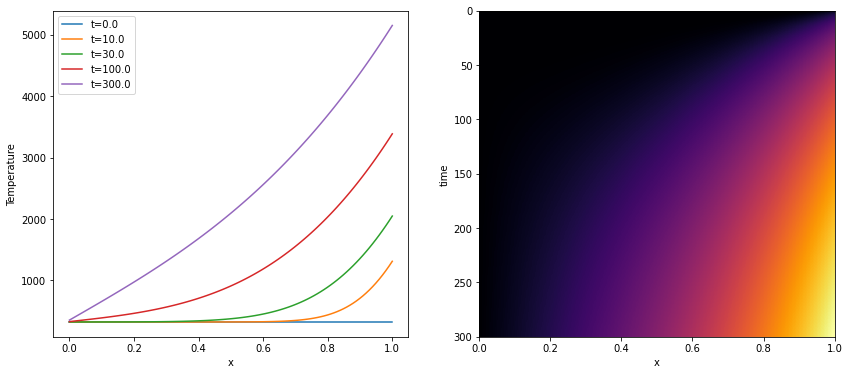

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# axs[0].set_ylim(300, 300)
axs[0].plot(x, u[0], label=f"t={0/t_steps*tn:0.1f}")
axs[0].plot(x, u[10], label=f"t={10/t_steps*tn:0.1f}")
axs[0].plot(x, u[30], label=f"t={30/t_steps*tn:0.1f}")
axs[0].plot(x, u[99], label=f"t={100/t_steps*tn:0.1f}")
axs[0].plot(x, u[299], label=f"t={300/t_steps*tn:0.1f}")
axs[0].legend()
axs[0].set_ylabel("Temperature")
axs[0].set_xlabel("x")
axs[1].imshow(u, aspect="auto", cmap="inferno", extent=[x0, xn, tn, t0])
axs[1].set_xlabel(f"x")
axs[1].set_ylabel("time")
plt.show()

In [8]:
# Solution u(x,t), where t=tn

u[-1]

array([ 355.42530755,  385.86443111,  416.32806364,  446.82689697,
        477.3716209 ,  507.97292658,  538.64150412,  569.38804013,
        600.22322135,  631.15773272,  662.20225572,  693.36747006,
        724.66405306,  756.10267847,  787.69401628,  819.44873394,
        851.37749475,  883.49095701,  915.79977571,  948.3146011 ,
        981.04607791, 1014.00484645, 1047.20154143, 1080.64679221,
       1114.3512218 , 1148.32544782, 1182.58008185, 1217.12572801,
       1251.97298522, 1287.13244486, 1322.61469094, 1358.43030177,
       1394.58984692, 1431.10388889, 1467.98298365, 1505.23767828,
       1542.87851234, 1580.9160179 , 1619.36071861, 1658.22313026,
       1697.51376042, 1737.24310803, 1777.42166398, 1818.05991201,
       1859.1683256 , 1900.75736996, 1942.83750421, 1985.41917793,
       2028.51283006, 2072.12889399, 2116.27779599, 2160.96995059,
       2206.21576693, 2252.02564466, 2298.40997762, 2345.37914983,
       2392.94353952, 2441.11351698, 2489.89944255, 2539.31167